In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
from tqdm import tqdm

In [2]:
def save_video_frame(input_video_path):
    out_dir = input_video_path[:-4]
    if not os.path.exists(out_dir):
        os.makedirs(out_dir)
    
    
    # Open the video
    cap = cv2.VideoCapture(input_video_path)
    

    # Check if video opened successfully
    if not cap.isOpened():
        print("Error: Couldn't open the video file.")
        return

    frame_no = 0
    while True:
        ret, frame = cap.read()
        
        # If frame is read correctly, ret is True
        if not ret:
            break
        frame_filename = os.path.join(out_dir, f"frame{frame_no:04d}.png")
        cv2.imwrite(frame_filename, frame)
        # Write the frame to the output video
        frame_no += 1

    cap.release()
    
    print(f'Save {frame_no} frames: {input_video_path}')

In [5]:
video_path = '/home/hwing/Dataset2/OVG-Nav/utils/visualizations/video_submission_source/success_example'
# video_name = '2azQ1b91cZZ_0020_cabinet_medium.avi'
# video_name = 'EU6Fwq7SyZv_0193_sofa_hard.avi'
video_name = 'zsNo4HB9uLZ_0020_bed_medium.avi'

save_video_frame(os.path.join(video_path, video_name))

Save 97 frames: /home/hwing/Dataset2/OVG-Nav/utils/visualizations/video_submission_source/success_example/zsNo4HB9uLZ_0020_bed_medium.avi


In [8]:
video_path = '/home/hwing/Dataset2/OVG-Nav/utils/visualizations/video_submission_source/failure_example'
video_names = os.listdir(video_path)

for name in video_names:
    if '.avi' in name or '.mp4' in name:
        save_video_frame(os.path.join(video_path, name))


Save 502 frames: /home/hwing/Dataset2/OVG-Nav/utils/visualizations/video_submission_source/failure_example/EU6Fwq7SyZv_0019_picture_hard.avi
Save 177 frames: /home/hwing/Dataset2/OVG-Nav/utils/visualizations/video_submission_source/failure_example/QUCTc6BB5sX_0123_bed_hard.avi
Save 502 frames: /home/hwing/Dataset2/OVG-Nav/utils/visualizations/video_submission_source/failure_example/2azQ1b91cZZ_0132_plant_hard.avi


In [7]:
video_names

['EU6Fwq7SyZv_0019_picture_hard.avi',
 'QUCTc6BB5sX_0123_bed_hard.avi',
 '2azQ1b91cZZ_0132_plant_hard.avi']

In [3]:
def get_img_parts(img):
    rgb = img[:240, :320]
    depth = img[:240, 320:]
    pano = img[240:240+160, :]
    graph = img[240+160:-60-241, :]
    local_map = img[-60-241:-60, :241]
    cap = img[-60:, :]
    
    return rgb, depth, pano, graph, local_map, cap

In [4]:
def get_rearranged_img(img):
    rgb, depth, pano, graph, local_map, cap = get_img_parts(img)
    nph, npw = 120, 120 * 4
    gh, gw = np.shape(graph)[0], np.shape(graph)[1]
    ngh, ngw = 480, int(480 * gw/gh)
    nh, nw = 480+120, max(320 + ngw, 120*4 + 120)
    new_base = np.zeros([nh, nw, 3])
    
    new_base[:240, :320] = rgb
    new_base[240:480, :320] = depth
    new_base[480:, :npw] = cv2.resize(pano, (npw, 120))
    new_base[:480, 320:320+ngw] = cv2.resize(graph, (ngw, 480))
    new_base[480:, npw:npw+120] = cv2.resize(local_map, (120, 120))
    return new_base

In [5]:
def save_video(frame_list, save_name, fps=5):

    width = np.shape(frame_list[0])[1]
    height = np.shape(frame_list[0])[0]

    video = cv2.VideoWriter(save_name, cv2.VideoWriter_fourcc(*'XVID'), fps,
                            (width, height))
    for image in frame_list:
#         print(np.shape(image))
#         image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = image[:, :, ::-1]
        video.write((image * 255).astype(np.uint8))
    video.release()

In [87]:
img_dir = '/home/hwing/Dataset2/OVG-Nav/utils/visualizations/video_submission_source/success_example'
epi_name = '2azQ1b91cZZ_0020_cabinet_medium'
# epi_name = 'EU6Fwq7SyZv_0193_sofa_hard'
# epi_name = 'zsNo4HB9uLZ_0020_bed_medium'


# img_dir = '/home/hwing/Dataset2/OVG-Nav/utils/visualizations/video_submission_source/failure_example'
# epi_name = 'EU6Fwq7SyZv_0019_picture_hard'
# # epi_name = 'QUCTc6BB5sX_0123_bed_hard'
# # epi_name = '2azQ1b91cZZ_0132_plant_hard'



target_list = os.listdir(os.path.join(img_dir, epi_name))
target_list.sort()
new_frames = []

for frame in tqdm(target_list, total=len(target_list)):
    img = plt.imread(os.path.join(img_dir, epi_name, frame))
    new_img = get_rearranged_img(img)
    new_frames.append(new_img)
    

    
save_video(new_frames, img_dir + '/new_' + epi_name + '.avi')


100%|███████████████████████████████████████████| 80/80 [00:01<00:00, 64.62it/s]


In [12]:
# video_path = '/home/hwing/Dataset2/OVG-Nav/utils/visualizations/video_submission_source/comparison'
# epi_name = 'zsNo4HB9uLZ_0001_bed_medium.avi'

video_path = '/home/hwing/Dataset2/OVG-Nav/utils/visualizations/video_submission_source/comparison/revision'
# epi_name = 'zsNo4HB9uLZ_0006_cabinet_easy.avi'
# epi_name = 'ex_red_rabbit_success.mp4'
epi_name = 'ex_poni_success.mp4'

save_video_frame(os.path.join(video_path, epi_name))

Save 146 frames: /home/hwing/Dataset2/OVG-Nav/utils/visualizations/video_submission_source/comparison/revision/ex_poni_success.mp4


In [13]:
# img_dir = '/home/hwing/Dataset2/OVG-Nav/utils/visualizations/video_submission_source/comparison'
# epi_name = 'ex_red_rabbit2'

img_dir = '/home/hwing/Dataset2/OVG-Nav/utils/visualizations/video_submission_source/comparison/revision'
epi_name = 'ex_red_rabbit_success'

target_list = os.listdir(os.path.join(img_dir, epi_name))
target_list.sort()
# img = plt.imread(os.path.join(img_dir, epi_name, target_list[0]))

new_frames = []
for frame in tqdm(target_list, total=len(target_list)):
    img = plt.imread(os.path.join(img_dir, epi_name, frame))
    new_img = np.zeros([240, 320+408, 3])
    new_img[:,:320] = cv2.resize(img[:, :323], (320,240))
    new_img[:, 320:] = img[:, 968:]
    new_frames.append(new_img)

save_video(new_frames, img_dir + '/new_' + epi_name + '.avi')

100%|████████████████████████████████████████| 396/396 [00:03<00:00, 110.18it/s]


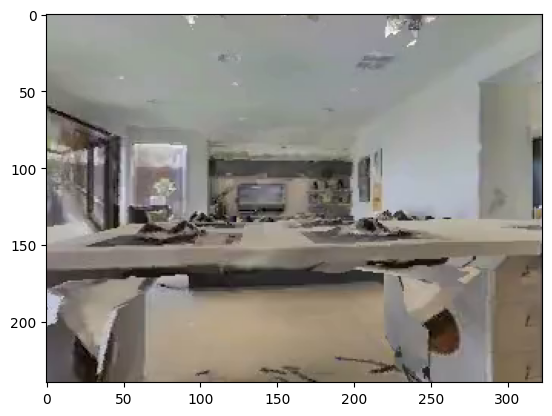

In [182]:
plt.imshow(img[:240, :323])

In [14]:
img_dir = '/home/hwing/Dataset2/OVG-Nav/utils/visualizations/video_submission_source/comparison/revision'
epi_name = 'ex_poni_success'

target_list = os.listdir(os.path.join(img_dir, epi_name))
target_list.sort()
# img = plt.imread(os.path.join(img_dir, epi_name, target_list[0]))
new_frames = []
for frame in tqdm(target_list, total=len(target_list)):
    img = plt.imread(os.path.join(img_dir, epi_name, frame))
    new_img = np.zeros([240, 320+408, 3])
    new_img[:,:320] = cv2.resize(img[50:530, 13:657], (320,240))
    new_img[:, 320:] = cv2.resize(img[:, -1104:], (408,240))
    new_frames.append(new_img)

save_video(new_frames, img_dir + '/new_' + epi_name + '.avi')

100%|█████████████████████████████████████████| 146/146 [00:05<00:00, 27.27it/s]


In [15]:
img_dir = '/home/hwing/Dataset2/OVG-Nav/utils/visualizations/video_submission_source/comparison'
epi_name = 'zsNo4HB9uLZ_0001_bed_medium'

target_list = os.listdir(os.path.join(img_dir, epi_name))
target_list.sort()
# img = plt.imread(os.path.join(img_dir, epi_name, target_list[0]))
new_frames = []
for frame in tqdm(target_list, total=len(target_list)):
    img = plt.imread(os.path.join(img_dir, epi_name, frame))
    new_img = np.zeros([240, 320+408, 3])
    new_img[:,:320] = img[:240, :320]
    new_img[:, 320:] = cv2.resize(img[:480, 320:-241], (408,240))
    new_frames.append(new_img)

save_video(new_frames, img_dir + '/new_' + epi_name + '.avi')

100%|███████████████████████████████████████████| 33/33 [00:00<00:00, 72.10it/s]


In [18]:
img_dir = '/home/hwing/Dataset2/OVG-Nav/utils/visualizations/video_submission_source/comparison/revision'
epi_name = 'zsNo4HB9uLZ_0006_cabinet_easy'

target_list = os.listdir(os.path.join(img_dir, epi_name))
target_list.sort()
# img = plt.imread(os.path.join(img_dir, epi_name, target_list[0]))
new_frames = []
for frame in tqdm(target_list, total=len(target_list)):
    img = plt.imread(os.path.join(img_dir, epi_name, frame))
    new_img = np.zeros([240, 320+408, 3])
    new_img[:,:320] = img[:240, :320]
    new_img[:, 320:] = cv2.resize(img[240+160:-301, :], (408,240))
    new_frames.append(new_img)

save_video(new_frames, img_dir + '/new_' + epi_name + '.avi')

100%|███████████████████████████████████████████| 33/33 [00:00<00:00, 69.19it/s]


In [190]:
img_dir = '/home/hwing/Dataset2/OVG-Nav/utils/visualizations/video_submission_source/real_world'
# epi_name = 'ex_bed.avi'
# epi_name = 'ex_table.avi'
epi_name = 'ex_cushion.avi'


save_video_frame(os.path.join(img_dir, epi_name))

Save 56 frames: /home/hwing/Dataset2/OVG-Nav/utils/visualizations/video_submission_source/real_world/ex_cushion.avi


In [198]:
def get_rearranged_realworld_img(img):
    rgb, depth, pano, graph, local_map, cap = get_img_parts(img)
    nph, npw = 120, 120 * 4
    gh, gw = np.shape(graph)[0], np.shape(graph)[1]
    ngh, ngw = 480, int(480 * gw/gh)
    nh, nw = 480+120, max(320 + ngw, 120*4 + 120)
    new_base = np.zeros([nh, nw, 3])
    
    new_base[:240, :320] = rgb
    new_base[240:480, :320] = depth
    new_base[480:, :npw] = cv2.resize(pano, (npw, 120))
#     new_base[:480, 320:320+ngw] = cv2.resize(graph, (ngw, 480))
    new_base[480:, npw:npw+120] = cv2.resize(local_map, (120, 120))
    return new_base, cv2.resize(graph, (ngw, 480))

In [203]:
img_dir = '/home/hwing/Dataset2/OVG-Nav/utils/visualizations/video_submission_source/real_world'
epi_name = 'ex_table'

target_list = os.listdir(os.path.join(img_dir, epi_name))
target_list.sort()
# img = plt.imread(os.path.join(img_dir, epi_name, target_list[0]))
new_frames = []
new_graph_frames = []
for frame in tqdm(target_list, total=len(target_list)):
    img = plt.imread(os.path.join(img_dir, epi_name, frame))
    new_img, new_graph = get_rearranged_realworld_img(img)
    new_frames.append(new_img)
    new_graph_frames.append(new_graph)

save_video(new_frames, img_dir + '/new_' + epi_name + '.avi')
save_video(new_graph_frames, img_dir + '/new_graph_' + epi_name + '.avi')

100%|███████████████████████████████████████████| 39/39 [00:00<00:00, 80.44it/s]


In [192]:
np.shape(img)

(1338, 640, 3)

In [271]:
img_dir = '/home/hwing/Dataset2/OVG-Nav/utils/visualizations/video_submission_source/real_world'
# epi_name = 'new_graph_ex_bed.avi'
# epi_name = 'ex_table.avi'
epi_name = 'new_graph_ex_cushion.avi'


save_video_frame(os.path.join(img_dir, epi_name))

Save 56 frames: /home/hwing/Dataset2/OVG-Nav/utils/visualizations/video_submission_source/real_world/new_graph_ex_cushion.avi


In [209]:
back = plt.imread(os.path.join(img_dir, 'background2.png'))
np.shape(back)

(637, 617, 4)

In [268]:
img_dir = '/home/hwing/Dataset2/OVG-Nav/utils/visualizations/video_submission_source/real_world'
epi_name = 'new_graph_ex_bed'

target_list = os.listdir(os.path.join(img_dir, epi_name))
target_list.sort()
# img = plt.imread(os.path.join(img_dir, epi_name, target_list[-1]))
new_frames = []
for frame in tqdm(target_list, total=len(target_list)):
    temp_back = cv2.resize(np.copy(back[:,:,:3]), (320,320))
    img = plt.imread(os.path.join(img_dir, epi_name, frame))
    w, h = np.shape(img)[0], np.shape(img)[1]
    for i in range(w):
        for j in range(h):
            if not sum(img[i,j]) > 2.7:
                if not 0<= i-120 < 320 and 0 < j-80 < 320:
                    continue
                temp_back[i-120, j-80] = img[i,j]
    new_frames.append(temp_back)

save_video(new_frames, img_dir + '/new_new_graph_' + epi_name + '.avi')

100%|███████████████████████████████████████████| 52/52 [00:37<00:00,  1.40it/s]


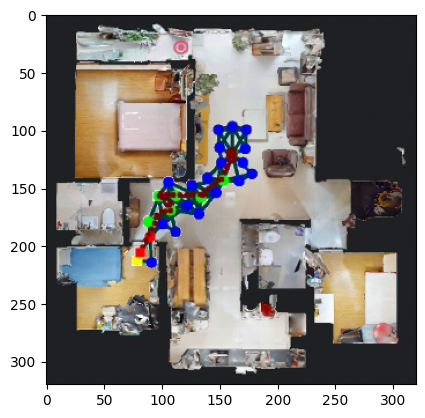

In [265]:
temp_back = cv2.resize(np.copy(back[:,:,:3]), (320,320))
w, h = np.shape(img)[0], np.shape(img)[1]
for i in range(w):
    for j in range(h):
        if not sum(img[i,j]) > 2.7:
            if not 0<= i-120 < 320 and 0 < j-80 < 320:
                continue
            temp_back[i-120, j-80] = img[i,j]
            
plt.imshow(temp_back)

In [287]:
img_dir = '/home/hwing/Dataset2/OVG-Nav/utils/visualizations/video_submission_source/real_world'
epi_name = 'new_graph_ex_cushion'

target_list = os.listdir(os.path.join(img_dir, epi_name))
target_list.sort()
# img = plt.imread(os.path.join(img_dir, epi_name, target_list[-1]))
new_frames = []
for frame in tqdm(target_list, total=len(target_list)):
    temp_back = cv2.resize(np.copy(back[:,:,:3]), (320,320))
    img = plt.imread(os.path.join(img_dir, epi_name, frame))
    w, h = np.shape(img)[0], np.shape(img)[1]
    for i in range(w):
        for j in range(h):
            if not sum(img[i,j]) > 2.7:
                if not 0<= 320-j+90 < 320 and 0 < i-100 < 320:
                    continue
                temp_back[320-j+85, i-105] = img[i,j]
    new_frames.append(temp_back)

save_video(new_frames, img_dir + '/new_new_graph_' + epi_name + '.avi')

100%|███████████████████████████████████████████| 56/56 [00:39<00:00,  1.41it/s]


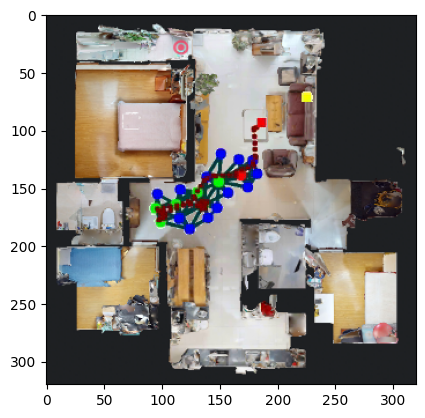

In [286]:
temp_back = cv2.resize(np.copy(back[:,:,:3]), (320,320))
w, h = np.shape(img)[0], np.shape(img)[1]
for i in range(w):
    for j in range(h):
        if not sum(img[i,j]) > 2.7:
            if not 0<= 320-j+90 < 320 and 0 < i-100 < 320:
                continue
            temp_back[320-j+85, i-105] = img[i,j]
            
plt.imshow(temp_back)

In [298]:
img_dir = '/home/hwing/Dataset2/OVG-Nav/utils/visualizations/video_submission_source/estimation'
epi_name = 'ex2'

target_list = os.listdir(os.path.join(img_dir, epi_name))
target_list.sort()
new_frames = []
for frame in tqdm(target_list, total=len(target_list)):
    img = plt.imread(os.path.join(img_dir, epi_name, frame))
    new_frames.append(img[:,:,:3])

save_video(new_frames, img_dir +'/' + epi_name + '.avi', fps=1)

100%|███████████████████████████████████████████| 14/14 [00:00<00:00, 14.57it/s]


In [296]:
np.shape(new_frames)

(8, 1250, 2105, 4)

In [216]:
np.shape(back)

(637, 617, 4)

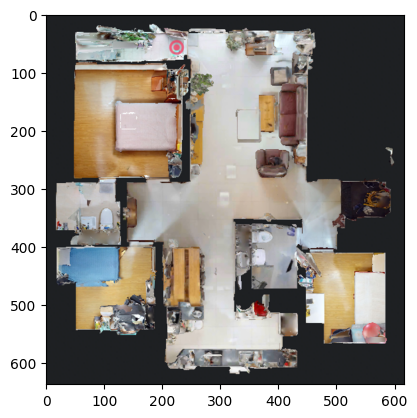

In [208]:
plt.imshow(back)

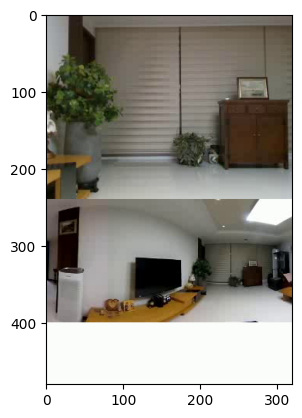

In [194]:
plt.imshow(img[:, :320])

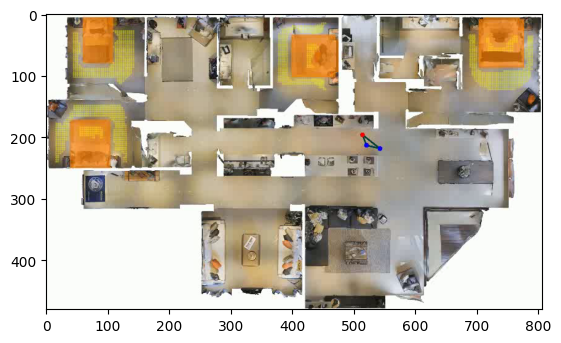

In [176]:
plt.imshow(img[:480, 320:-241])

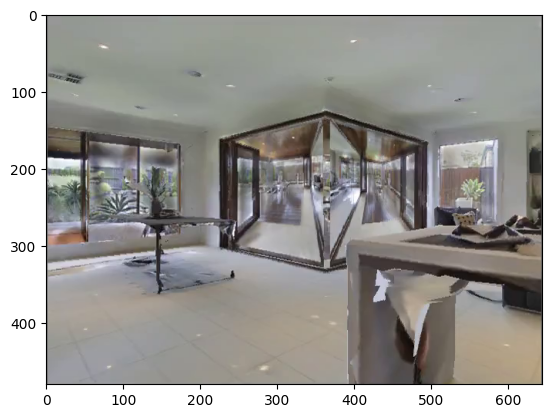

In [156]:
plt.imshow(img[50:530, 13:657])

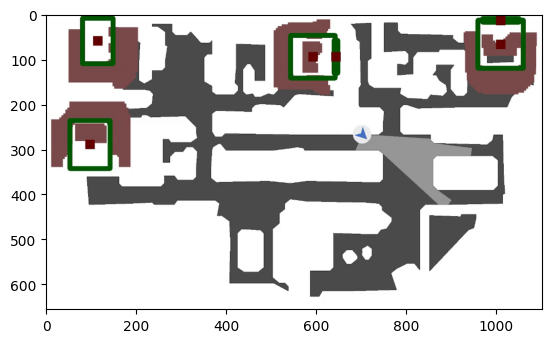

In [163]:
plt.imshow(img[:, -1104:])

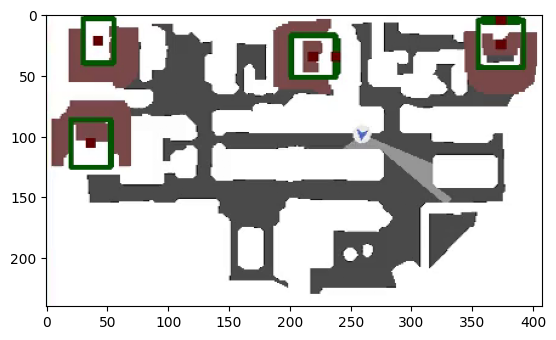

In [130]:
plt.imshow(img[:, 968:])

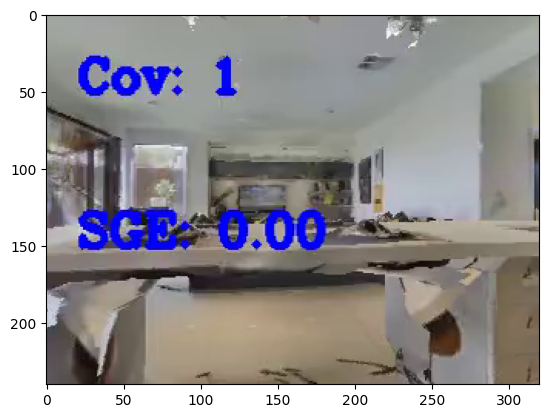

In [126]:
plt.imshow(img[:,:320])

In [92]:
rgb = img[:240, :320]
rgb = cv2.resize(rgb, (240,int(240*240/320)))
plt.imsave(img_name.replace('.jpg', '_rgb.jpg'), rgb)
depth = img[240:480, :320]
depth = cv2.resize(depth, (240,int(240*240/320)))
plt.imsave(img_name.replace('.jpg', '_depth.jpg'), depth)
pano_rgb = img[480:480+128, :512]
pano_rgb = cv2.resize(pano_rgb, (480,120))
plt.imsave(img_name.replace('.jpg', '_pano_rgb.jpg'), pano_rgb)
graph = img[:480, 320:-241]
plt.imsave(img_name.replace('.jpg', '_graph.jpg'), graph)



NameError: name 'img_name' is not defined

In [58]:
rgb = cv2.resize(rgb, (240,int(240*240/320)))

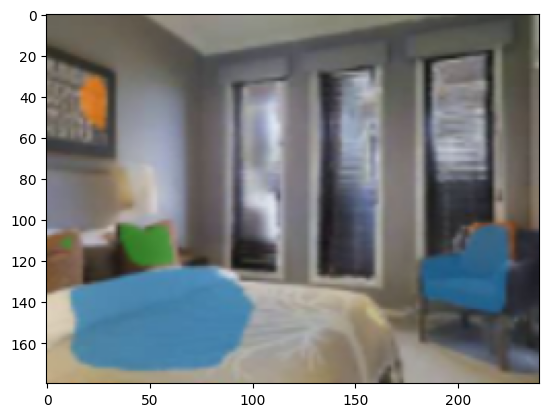

In [59]:
plt.imshow(rgb)

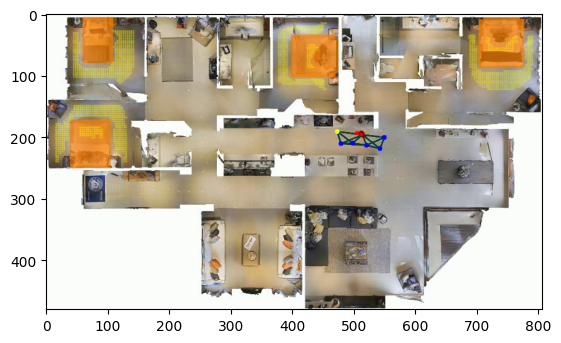

In [38]:
graph = img[:480, 320:-241]

In [98]:
def make_cropped_frame(image):
    new_image = np.zeros([608, 640, 3]).astype(np.uint8)
#     print(np.shape(new_image))
#     print(np.shape(image))
    new_image[:240, :] = image[:240, :]
    new_image[240:, :] = image[400:, :]
    return new_image

In [99]:
def resize_video_to_custom_dimensions(input_path, output_path, new_width, new_height):
    # Open the video
    cap = cv2.VideoCapture(input_path)

    # Check if video opened successfully
    if not cap.isOpened():
        print("Error: Couldn't open the video file.")
        return

    # Define the codec and create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'MP4V')  # For MP4 videos
    out = cv2.VideoWriter(output_path, fourcc, 5.0, (new_width, new_height))

    while True:
        ret, frame = cap.read()
        
        # If frame is read correctly, ret is True
        if not ret:
            break
        frame = make_cropped_frame(frame)
        # Resize the frame to custom dimensions
#         resized_frame = cv2.resize(frame, (new_width, new_height))

        # Write the frame to the output video
        out.write(frame)

    # Release the video objects
    cap.release()
    out.release()

In [100]:
input_path = '/home/hwing/Dataset2/OVG-Nav/utils/visualizations/image_exs/example.mp4'
output_path = '/home/hwing/Dataset2/OVG-Nav/utils/visualizations/image_exs/example2.mp4'
resize_video_to_custom_dimensions(input_path, output_path, 160, 160)  # Resizes video to 640x480

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


In [300]:
src_dir = '/home/hwing/Dataset2/OVG-Nav/utils/visualizations/video_submission_source/submit_videos'
cases = os.listdir(src_dir)

for case in cases:
    names = os.listdir(src_dir +'/' +case)
    for name in names:
        file_name = src_dir + '/' + case + '/' + name
        save_video_frame(file_name)
        print('Done', file_name)

Save 80 frames: /home/hwing/Dataset2/OVG-Nav/utils/visualizations/video_submission_source/submit_videos/success_example/new_2azQ1b91cZZ_0020_cabinet_medium.avi
Done /home/hwing/Dataset2/OVG-Nav/utils/visualizations/video_submission_source/submit_videos/success_example/new_2azQ1b91cZZ_0020_cabinet_medium.avi
Save 97 frames: /home/hwing/Dataset2/OVG-Nav/utils/visualizations/video_submission_source/submit_videos/success_example/new_zsNo4HB9uLZ_0020_bed_medium.avi
Done /home/hwing/Dataset2/OVG-Nav/utils/visualizations/video_submission_source/submit_videos/success_example/new_zsNo4HB9uLZ_0020_bed_medium.avi
Save 173 frames: /home/hwing/Dataset2/OVG-Nav/utils/visualizations/video_submission_source/submit_videos/success_example/new_EU6Fwq7SyZv_0193_sofa_hard.avi
Done /home/hwing/Dataset2/OVG-Nav/utils/visualizations/video_submission_source/submit_videos/success_example/new_EU6Fwq7SyZv_0193_sofa_hard.avi
Save 177 frames: /home/hwing/Dataset2/OVG-Nav/utils/visualizations/video_submission_source